In [1]:
%tensorflow_version 2.x


In [2]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
!wget https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0


--2020-12-10 18:54:09--  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5721wcs2guuykzl/stacksample.zip [following]
--2020-12-10 18:54:09--  https://www.dropbox.com/s/raw/5721wcs2guuykzl/stacksample.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd3359f16d3ab92bb17c091c7ce.dl.dropboxusercontent.com/cd/0/inline/BE31jamMPQ614IousX79u213HWbi9faBTasHUmb_uVr3f1YPTyeQioniu3A9BbPeMJdPgQhzcSdBdGyuIXt-_-v0CkMOMiC8mjWxsLf6GuEOdw/file# [following]
--2020-12-10 18:54:09--  https://ucd3359f16d3ab92bb17c091c7ce.dl.dropboxusercontent.com/cd/0/inline/BE31jamMPQ614IousX79u213HWbi9faBTasHUmb_uVr3f1YPTyeQioniu3A9BbPeMJdPgQhzcSdBdGyuIXt-_-v0CkMOMiC8mjWxsLf6GuEOdw/file
Reso

In [4]:
!unzip '/content/stacksample.zip?dl=0'


Archive:  /content/stacksample.zip?dl=0
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [5]:

questions = r'/content/Questions.csv'
answers = r'/content/Answers.csv'
tags = r'/content/Tags.csv'

In [6]:
questions_data = pd.read_csv(questions,encoding ='latin 1' )
answers_data = pd.read_csv(answers,encoding ='latin 1')
tags_data = pd.read_csv(tags,encoding ='latin 1')

In [7]:
questions_data.head(n=2)


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


In [8]:
tags_data.head(2)


,Id,Tag
0,80,flex
1,80,actionscript-3


In [9]:
grouped_tags = tags_data.groupby("Tag", sort='count').size().reset_index(name='count')


In [10]:
grouped_tags


,Tag,count
0,.a,13
1,.app,14
2,.aspxauth,6
3,.bash-profile,46
4,.class-file,19
...,...,...
37029,zwoptex,3
37030,zxing,159
37031,zxspectrum,1
37032,zynq,11


In [11]:
grouped_tags.Tag.describe()


count          37034
unique         37034
top       evaluation
freq               1
Name: Tag, dtype: object

In [12]:

#Reducing the problem to the most common tags in the dataset
num_classes = 10
grouped_tags_1 = tags_data.groupby("Tag").size().reset_index(name='count')
top_10_tags = grouped_tags_1.nlargest(num_classes,columns="count")

In [13]:
top_10_tags


,Tag,count
16121,javascript,124155
16020,java,115212
4301,c#,101186
24211,php,98808
979,android,90659
16611,jquery,78542
25712,python,64601
14180,html,58976
4311,c++,47591
15565,ios,47009


In [14]:
tags_data.Tag = tags_data.Tag.apply(lambda tag : tag if tag in top_10_tags.Tag.values else None)


In [15]:
tags_data


,Id,Tag
0,80,None
1,80,None
2,80,None
3,90,None
4,90,None
...,...,...
3750989,40143360,javascript
3750990,40143360,None
3750991,40143380,None
3750992,40143380,None


In [16]:
tags_data.dropna(inplace=True)


In [17]:
tags_data


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
...,...,...
3750974,40143150,javascript
3750981,40143190,python
3750984,40143210,php
3750987,40143340,android


In [18]:
#preparing the contents of dataframe
#text = '<p dgqwifgwi> This is important </p>'
import re

def strip_html_tags(body) :
  regex = re.compile('<.*?>')
  return re.sub(regex, '', body)

In [19]:
questions_data['Body'] = questions_data.Body.apply(strip_html_tags)


In [20]:
questions_data['Body']


0          I've written a database generation script in S...
1          Are there any really good tutorials explaining...
2          Has anyone got experience creating SQL-based A...
3          This is something I've pseudo-solved many time...
4          I have a little game written in C#. It uses a ...
                                 ...                        
1264211    I am building a custom MVC project and I have ...
1264212    The API docs show that you should be able to m...
1264213    Under minifyEnabled I changed from false to tr...
1264214    I have input which I use to filter my array of...
1264215    I'm running a mocha test and I noticed my chan...
Name: Body, Length: 1264216, dtype: object

In [21]:
questions_data['Text'] = questions_data['Title']+' '+questions_data['Body']


In [22]:
questions_data['Text']


0          SQLStatement.execute() - multiple queries in o...
1          Good branching and merging tutorials for Torto...
2          ASP.NET Site Maps Has anyone got experience cr...
3          Function for creating color wheels This is som...
4          Adding scripting functionality to .NET applica...
                                 ...                        
1264211    URL routing in PHP (MVC) I am building a custo...
1264212    Bigquery.Jobs.Insert - Resumable Upload? The A...
1264213    Obfuscating code in android studio Under minif...
1264214    How to fire function after v-model change? I h...
1264215    npm run mocha test - files being cached I'm ru...
Name: Text, Length: 1264216, dtype: object

In [23]:
questions_data.shape


(1264216, 8)

In [24]:
tags_data.shape


(826739, 2)

In [25]:
tags_data.head(2)


,Id,Tag
14,260,c#
18,330,c++


In [26]:
questions_data.sort_values('Id')


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Text
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...,SQLStatement.execute() - multiple queries in o...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...,Good branching and merging tutorials for Torto...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...,ASP.NET Site Maps Has anyone got experience cr...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,This is something I've pseudo-solved many time...,Function for creating color wheels This is som...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,Adding scripting functionality to .NET applica...
...,...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...,URL routing in PHP (MVC) I am building a custo...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,The API docs show that you should be able to m...,Bigquery.Jobs.Insert - Resumable Upload? The A...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...,Obfuscating code in android studio Under minif...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...,How to fire function after v-model change? I h...


In [27]:
tags_data.sort_values('Id')


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
...,...,...
3750974,40143150,javascript
3750981,40143190,python
3750984,40143210,php
3750987,40143340,android


In [28]:
tags_data.nunique()


Id     706336
Tag        10
dtype: int64

In [29]:
tag_Ids = list(tags_data['Id'])


In [30]:

questiond_data_top_10 = questions_data[questions_data['Id'].isin(tag_Ids)]
questiond_data_top_10

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Text
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,Adding scripting functionality to .NET applica...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,I am working on a collection of classes used f...,Should I use nested classes in this case? I am...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,I would like the version property of my applic...,Automatically update version number I would li...
10,930,245.0,2008-08-04T00:47:25Z,NaN,28,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,How do I connect to a database and loop over a...
11,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,"How to get the value of built, encoded ViewSta..."
...,...,...,...,...,...,...,...,...
1264208,40143150,5496690.0,2016-10-19T23:31:41Z,NaN,0,"YouTube iFrame API: no ready call, no error call","I'm trying to detect the ""flash out of date"" e...","YouTube iFrame API: no ready call, no error ca..."
1264210,40143190,333403.0,2016-10-19T23:36:01Z,NaN,1,How to execute multiline python code from a ba...,I need to extend a shell script (bash). As I a...,How to execute multiline python code from a ba...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...,URL routing in PHP (MVC) I am building a custo...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...,Obfuscating code in android studio Under minif...


In [31]:
questions_data_top_10 = questiond_data_top_10.merge(tags_data)
questions_data_top_10


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Text,Tag
0,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,Adding scripting functionality to .NET applica...,c#
1,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,I am working on a collection of classes used f...,Should I use nested classes in this case? I am...,c++
2,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,I would like the version property of my applic...,Automatically update version number I would li...,c#
3,930,245.0,2008-08-04T00:47:25Z,NaN,28,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,How do I connect to a database and loop over a...,c#
4,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,"How to get the value of built, encoded ViewSta...",c#
...,...,...,...,...,...,...,...,...,...
826734,40143150,5496690.0,2016-10-19T23:31:41Z,NaN,0,"YouTube iFrame API: no ready call, no error call","I'm trying to detect the ""flash out of date"" e...","YouTube iFrame API: no ready call, no error ca...",javascript
826735,40143190,333403.0,2016-10-19T23:36:01Z,NaN,1,How to execute multiline python code from a ba...,I need to extend a shell script (bash). As I a...,How to execute multiline python code from a ba...,python
826736,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...,URL routing in PHP (MVC) I am building a custo...,php
826737,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...,Obfuscating code in android studio Under minif...,android


In [32]:
questions_data_top_10.drop(['OwnerUserId','CreationDate','ClosedDate','Score','Title','Body'],axis=1,inplace=True)


In [33]:
tag_data = pd.DataFrame(questions_data_top_10['Tag'])#


In [34]:
tag_data.to_csv('tag_data.csv')


In [35]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer

In [36]:
multiLableBinarizer = MultiLabelBinarizer()
multiLableBinarizer.fit([questions_data_top_10.Tag])


MultiLabelBinarizer(classes=None, sparse_output=False)

In [37]:

Labels = multiLableBinarizer.classes_
Labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [38]:
sam = multiLableBinarizer.transform(questions_data_top_10.Tag)


In [39]:
sam


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
y = pd.get_dummies(questions_data_top_10.Tag).to_numpy()


In [41]:
maxlen = 180
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(questions_data_top_10.Text)

In [42]:
def get_features(text_series):
    """
    transforms text data to feature_vectors that can be used in the ml model.
    tokenizer must be available.
    """
    sequences = tokenizer.texts_to_sequences(text_series)
    return pad_sequences(sequences, maxlen=maxlen)

def prediction_to_label(prediction):
    tag_prob = [(labels[i], prob) for i, prob in enumerate(prediction.tolist())]
    return dict(sorted(tag_prob, key=lambda kv: kv[1], reverse=True))

In [43]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')

x = get_features(questions_data_top_10.Text)

In [44]:
x.shape


(826739, 180)

In [45]:
y.shape


(826739, 10)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [47]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

filter_length = 300

model = Sequential()
model.add(Embedding(max_words, 20, input_length=maxlen))
model.add(Dropout(0.1))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 180, 20)           100000    
_________________________________________________________________
dropout (Dropout)            (None, 180, 20)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 178, 300)          18300     
_________________________________________________________________
global_max_pooling1d (Global (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3010      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 121,310
Trainable params: 121,310
Non-trainable params: 0
__________________________________________________

In [48]:
history=model.fit(x_train,y_train,epochs=7,validation_split=0.2)


Epoch 1/7
16535/16535 [==============================] - 97s 6ms/step - loss: 0.1245 - categorical_accuracy: 0.7385 - val_loss: 0.1123 - val_categorical_accuracy: 0.7637
Epoch 2/7
16535/16535 [==============================] - 97s 6ms/step - loss: 0.1106 - categorical_accuracy: 0.7658 - val_loss: 0.1096 - val_categorical_accuracy: 0.7663
Epoch 3/7
16535/16535 [==============================] - 96s 6ms/step - loss: 0.1083 - categorical_accuracy: 0.7698 - val_loss: 0.1099 - val_categorical_accuracy: 0.7649
Epoch 4/7
16535/16535 [==============================] - 96s 6ms/step - loss: 0.1071 - categorical_accuracy: 0.7721 - val_loss: 0.1110 - val_categorical_accuracy: 0.7640
Epoch 5/7
16535/16535 [==============================] - 97s 6ms/step - loss: 0.1062 - categorical_accuracy: 0.7742 - val_loss: 0.1081 - val_categorical_accuracy: 0.7670
Epoch 6/7
16535/16535 [==============================] - 96s 6ms/step - loss: 0.1054 - categorical_accuracy: 0.7753 - val_loss: 0.1080 - val_categoric

In [49]:
y_pred = model.predict_classes(x_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
y_pred


array([3, 0, 1, ..., 9, 9, 0])

In [51]:
model.evaluate(x_test,y_test)


5168/5168 [==============================] - 12s 2ms/step - loss: 0.1081 - categorical_accuracy: 0.7687


[0.1081254705786705, 0.7687241435050964]

In [52]:
import matplotlib.pyplot as plt


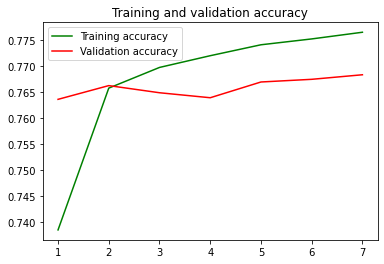

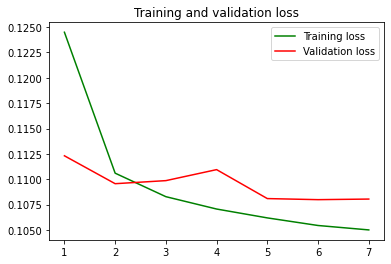

In [53]:
# Plot results
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [64]:
y_pred = model.predict(x_test)


In [65]:
y_pred [y_pred > 0.5] = 1.0
y_pred[y_pred <= 0.5] = 0.0

In [66]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
from  sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred)

In [68]:
auc

0.8550927615964115

In [69]:
pred = pd.DataFrame(y_pred)


In [72]:
#exporting predictions to predictions file
pred.to_csv('stack-over-flow-predctions.csv',index=False)